<a href="https://colab.research.google.com/github/alezab/cs-ai/blob/master/AI_27_05_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD

In [63]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                 header=None, encoding='utf-8')
y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-versicolor', 0, 1)
X = df.iloc[50:150, :4].values
sc = StandardScaler()
X_std = sc.fit_transform(X)
X_std.shape, y.shape

((100, 4), (100,))

In [64]:
model = Sequential()
model.add(Input(shape=(X_std.shape[1],)))
model.add(Dense(2, 'relu'))
model.add(Dense(1, 'sigmoid'))
model.compile(optimizer=SGD(learning_rate= 0.1),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [65]:
fit = model.fit(X_std, y, epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4908 - loss: 0.7013 
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4942 - loss: 0.6660
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5220 - loss: 0.6472
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5129 - loss: 0.6475
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7309 - loss: 0.6188
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7285 - loss: 0.6091
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7555 - loss: 0.5961
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7345 - loss: 0.5948
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7554 - loss: 0.5750
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7554 - loss: 0.5544
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7219 - loss: 0.5830
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7561 - l

In [66]:
pd.DataFrame(fit.history)

,accuracy,loss
0,0.49,0.700641
1,0.47,0.673218
2,0.49,0.655481
3,0.54,0.640611
4,0.71,0.624614
...,...,...
95,0.97,0.085560
96,0.97,0.084180
97,0.97,0.083314
98,0.97,0.082665


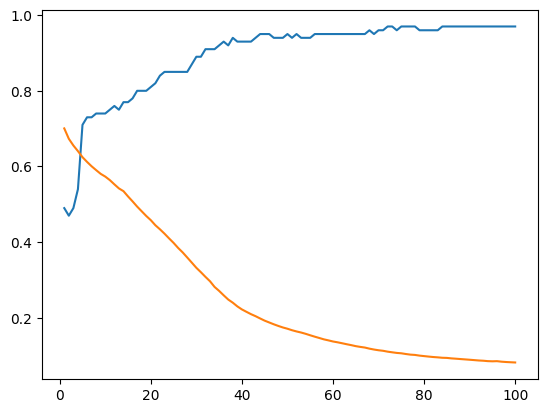

In [67]:
plt.plot(1+np.arange(100), pd.DataFrame(fit.history));

In [68]:
model.predict(X_std).round()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],